# SARSA explanation


SARSA vs Q-learning
The difference between these two algorithms is that SARSA chooses an action following the current policy and updates its Q-values, whereas Q-learning chooses the greedy action. A greedy action is one that gives the maximum Q-value for the state, that is, it follows an optimal policy.

model free
- does not get the agent to explore the entire env first

on policy
SARSA (so called because it uses state–action–reward–state–action experiences to update the Q -values) is an on-policy reinforcement learning algorithm that estimates the value of the policy being followed.


# code

https://www.youtube.com/watch?v=P9XezMuPfLE&ab_channel=MachineLearningwithPhil

1. initialise lr 
2. initialise Q(s,a) - Q table 
3. initialise S 
4. choose A(S) using epsilon greedy method from Q table
Loop
- take action A, get reward and new state,S'
- choose A'(S') using epsilon greedy method from Q table
- Q(s,a) -> Q(s,a) +lr*[R + gamma*Q(s',a')-Q(s,a)]
- S->S',A->A'

cartpole possible states are infinite even tho it is a discrete action space
- as such Q table wouldnt work since Q table needs finite state space
- as such there is need to discretize the state space

################## START TRAINING ##################
Episode 5000, Ave past 1000 episodes reward: 0.00, Time elapsed: 6.34s
Episode 10000, Ave past 1000 episodes reward: 0.00, Time elapsed: 12.11s
Episode 15000, Ave past 1000 episodes reward: 0.00, Time elapsed: 16.17s
Episode 20000, Ave past 1000 episodes reward: 0.00, Time elapsed: 19.48s
Episode 25000, Ave past 1000 episodes reward: 0.00, Time elapsed: 22.44s
Episode 30000, Ave past 1000 episodes reward: 0.00, Time elapsed: 25.51s
Episode 35000, Ave past 1000 episodes reward: 0.00, Time elapsed: 28.53s
Episode 40000, Ave past 1000 episodes reward: 0.00, Time elapsed: 31.28s
Episode 45000, Ave past 1000 episodes reward: 0.00, Time elapsed: 34.11s
Episode 50000, Ave past 1000 episodes reward: 0.00, Time elapsed: 37.19s
################## END TRAINING ##################
Total time elapsed: 37.19s


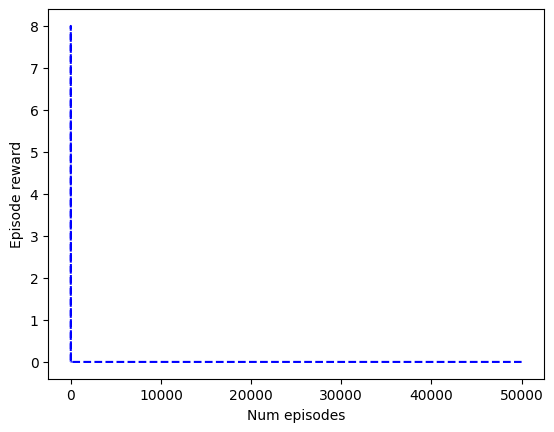

In [31]:
#haidi edited code

import numpy as np
import matplotlib.pyplot as plt
import gym
import time

def maxAction(Q,state,n_actions):
    values=np.array([Q[state,a] for a in range(n_actions)]) 
    action=np.argmax(values)
    return action

#discretize the state space
# cart x position, cart velocity, pole theta, pole velocity
cartPosSpace=np.linspace(-2.4,2.4,10)
cartVelSpace=np.linspace(-4,4,10)
poleThetaSpace=np.linspace(-0.20943951,0.20943951,10)
poleThetaVelSpace=np.linspace(-4,4,10)


def getState(observation):
    cartX,cartXdot,cartTheta,cartThetadot=observation
    cartX=int(np.digitize(cartX,cartPosSpace))
    cartXdot=int(np.digitize(cartXdot,cartVelSpace))
    cartTheta=int(np.digitize(cartTheta,poleThetaSpace))
    cartThetadot=int(np.digitize(cartThetadot,poleThetaVelSpace))
    return (cartX,cartXdot,cartTheta,cartThetadot)

if __name__=='__main__':
    env=gym.make('CartPole-v0')
    #model hyperparameters
    LR=0.1
    GAMMA=0.9
    EPSILON=1.0
    n_actions=2
    n_episodes=50000
    
    start_time=time.time()
    
    #create entire state space after discretizing it
    states=[]
    for i in range(len(cartPosSpace)+1):
        for j in range(len(cartVelSpace)+1):
            for k in range(len(poleThetaSpace)+1):
                for l in range(len(poleThetaVelSpace)+1):
                    states.append((i,j,k,l))
                    
    Q={} #Q table
    for s in states:
        for a in range(n_actions):
            Q[s,a]=0
            
    totalRewards=np.zeros(n_episodes)
    print('################## START TRAINING ##################')
    for eps in range(n_episodes):
        #cart x position, cart velocity, pole theta, pole velocity
        #initialise state action rewards done at start of every episode 
        observation=env.reset()
        state=getState(observation)
        rand=np.random.random()
        action=maxAction(Q,s,n_actions) if rand<(1-EPSILON) else env.action_space.sample()
        done=False
        eps_rewards=0
        
        while not done:
            new_observation,reward,done,_=env.step(action)
            new_state=getState(new_observation)
            rand=np.random.random()
            new_action=maxAction(Q,s,n_actions) if rand<(1-EPSILON) else env.action_space.sample()
            eps_rewards+=reward
            Q[s,a]=Q[s,a]+LR*(reward+GAMMA*Q[new_state,new_action]-Q[s,a])
            state,action=new_state,new_action
        
        #decay the epsilon value
        EPSILON-=2/(n_episodes) if EPSILON>0 else 0 #or can put epsilon_min value here
        totalRewards[i]=eps_rewards
        
        if (eps+1)%5000==0:
            #calc average reward of past 1000 episodes
            ave_past_thousand__eps_rewards=sum(totalRewards[eps-1000:eps])/1000
            print(f'Episode {eps+1}, Ave past 1000 episodes reward: {ave_past_thousand__eps_rewards:.2f}, Time elapsed: {(time.time()-start_time):.2f}s')
            
print('################## END TRAINING ##################')
print(f'Total time elapsed: {(time.time()-start_time):.2f}s')

plt.plot(totalRewards, 'b--')
plt.xlabel('Num episodes')
plt.ylabel('Episode reward')
plt.show()    

Episode 5000, Ave past 1000 episodes reward: 32.92, Time elapsed: 7.95s
Episode 10000, Ave past 1000 episodes reward: 56.32, Time elapsed: 21.05s
Episode 15000, Ave past 1000 episodes reward: 116.65, Time elapsed: 47.37s
Episode 20000, Ave past 1000 episodes reward: 181.65, Time elapsed: 94.51s
Episode 25000, Ave past 1000 episodes reward: 199.47, Time elapsed: 154.09s
Episode 30000, Ave past 1000 episodes reward: 200.00, Time elapsed: 216.43s
Episode 35000, Ave past 1000 episodes reward: 186.33, Time elapsed: 272.41s
Episode 40000, Ave past 1000 episodes reward: 185.61, Time elapsed: 326.11s
Episode 45000, Ave past 1000 episodes reward: 185.11, Time elapsed: 382.00s
Episode 50000, Ave past 1000 episodes reward: 186.18, Time elapsed: 440.72s


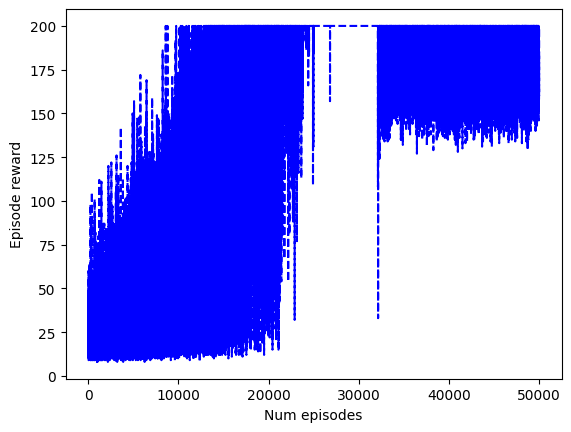

In [28]:
#run author code from source
import numpy as np
import matplotlib.pyplot as plt
import gym

def maxAction(Q, state):    
    values = np.array([Q[state,a] for a in range(2)])
    action = np.argmax(values)
    return action

#discretize the spaces
poleThetaSpace = np.linspace(-0.20943951, 0.20943951, 10)
poleThetaVelSpace = np.linspace(-4, 4, 10)
cartPosSpace = np.linspace(-2.4, 2.4, 10)
cartVelSpace = np.linspace(-4, 4, 10)

def getState(observation):
    cartX, cartXdot, cartTheta, cartThetadot = observation
    cartX = int(np.digitize(cartX, cartPosSpace))
    cartXdot = int(np.digitize(cartXdot, cartVelSpace))
    cartTheta = int(np.digitize(cartTheta, poleThetaSpace))
    cartThetadot = int(np.digitize(cartThetadot, poleThetaVelSpace))

    return (cartX, cartXdot, cartTheta, cartThetadot)

if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    # model hyperparameters
    ALPHA = 0.1
    GAMMA = 0.9    
    EPS = 1.0
    start_time=time.time()

    #construct state space
    states = []
    for i in range(len(cartPosSpace)+1):
        for j in range(len(cartVelSpace)+1):
            for k in range(len(poleThetaSpace)+1):
                for l in range(len(poleThetaVelSpace)+1):
                    states.append((i,j,k,l))

    Q = {}
    for s in states:
        for a in range(2):
            Q[s, a] = 0

    numGames = 50000
    totalRewards = np.zeros(numGames)
    for i in range(numGames):
        if (i+1)%5000==0:
            #calc average reward of past 1000 episodes
            ave_past_thousand__eps_rewards=sum(totalRewards[i-1000:i])/1000
            print(f'Episode {i+1}, Ave past 1000 episodes reward: {ave_past_thousand__eps_rewards:.2f}, Time elapsed: {(time.time()-start_time):.2f}s')
            
        # cart x position, cart velocity, pole theta, pole velocity
        observation = env.reset()        
        s = getState(observation)
        rand = np.random.random()
        a = maxAction(Q, s) if rand < (1-EPS) else env.action_space.sample()
        done = False
        epRewards = 0
        while not done:
            observation_, reward, done, info = env.step(a)   
            s_ = getState(observation_)
            rand = np.random.random()
            a_ = maxAction(Q, s_) if rand < (1-EPS) else env.action_space.sample()
            epRewards += reward
            Q[s,a] = Q[s,a] + ALPHA*(reward + GAMMA*Q[s_,a_] - Q[s,a])
            s, a = s_, a_            
        EPS -= 2/(numGames) if EPS > 0 else 0
        totalRewards[i] = epRewards

    plt.plot(totalRewards, 'b--')
    plt.xlabel('Num episodes')
    plt.ylabel('Episode reward')
    plt.show()     

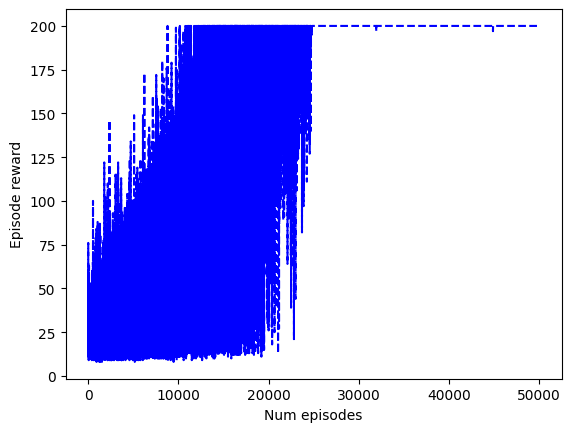

In [20]:
#correct plot from author

plt.plot(totalRewards, 'b--')
plt.xlabel('Num episodes')
plt.ylabel('Episode reward')
plt.show()    